In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

# Cargar datos
data = pd.read_csv('recursos_humanos.csv')

In [10]:
# recodificar la variable salary y sales
data = pd.get_dummies(data, columns=['salary', 'sales'])
dummy_columns = [col for col in data.columns if 'salary_' in col or 'sales_' in col]
data[dummy_columns] = data[dummy_columns].astype(int)
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,...,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [11]:
# Normalizacion de las categorias
# para tener valores entre 0 y 1
# se usa la formula (x - min(x)) / (max(x) - min(x))

data['average_montly_hours'] = (data['average_montly_hours'] - data['average_montly_hours'].min()) / (data['average_montly_hours'].max() - data['average_montly_hours'].min())
data['time_spend_company'] = (data['time_spend_company'] - data['time_spend_company'].min()) / (data['time_spend_company'].max() - data['time_spend_company'].min())
data['number_project'] = (data['number_project'] - data['number_project'].min()) / (data['number_project'].max() - data['number_project'].min())
data['satisfaction_level'] = (data['satisfaction_level'] - data['satisfaction_level'].min()) / (data['satisfaction_level'].max() - data['satisfaction_level'].min())
data['last_evaluation'] = (data['last_evaluation'] - data['last_evaluation'].min()) / (data['last_evaluation'].max() - data['last_evaluation'].min())
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,...,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.318681,0.265625,0.0,0.285047,0.125,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.780220,0.781250,0.6,0.775701,0.500,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.021978,0.812500,1.0,0.822430,0.250,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.692308,0.796875,0.6,0.593458,0.375,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.307692,0.250000,0.0,0.294393,0.125,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.340659,0.328125,0.0,0.257009,0.125,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14995,0.307692,0.187500,0.0,0.299065,0.125,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14996,0.307692,0.265625,0.0,0.219626,0.125,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14997,0.021978,0.937500,0.8,0.859813,0.250,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [12]:
X = data.drop('left', axis=1)
y = data['left']

# Dividir la base de datos en entrenamiento y prueba

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

print('Grupo de entrenamiento:', x_train.shape, y_train.shape)
print('Grupo de prueba:', x_test.shape, y_test.shape)

Grupo de entrenamiento: (10499, 20) (10499,)
Grupo de prueba: (4500, 20) (4500,)


In [13]:
# Verificando los tipos de datos que sean Númericos
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project           float64
average_montly_hours     float64
time_spend_company       float64
Work_accident              int64
left                       int64
promotion_last_5years      int64
salary_high                int64
salary_low                 int64
salary_medium              int64
sales_IT                   int64
sales_RandD                int64
sales_accounting           int64
sales_hr                   int64
sales_management           int64
sales_marketing            int64
sales_product_mng          int64
sales_sales                int64
sales_support              int64
sales_technical            int64
dtype: object

## Modelado por VSM

### 1.- Radial Basis Function

In [14]:
# Importando la libreria de SVM y realizando un ajuste para un kernel Radial Basis Function
from sklearn import svm
clf = svm.SVC(kernel='rbf')
# se realiza un ajuste
clf.fit(x_train, y_train)

SVC()

In [15]:
#creando la predicción y matriz de confusión

from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_test)
confusion_matrix(y_test, y_pred)


array([[3308,  136],
       [ 150,  906]])

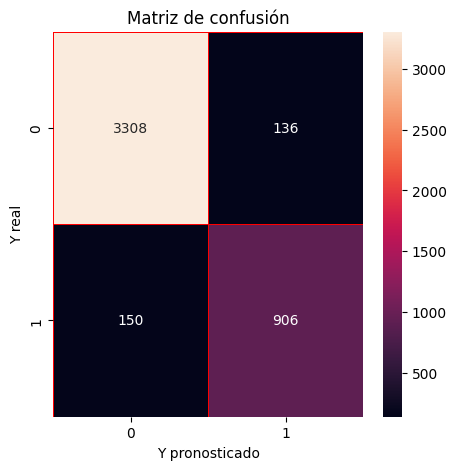

In [16]:
# visualizando la matriz de confusión

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, linewidths=0.5, linecolor='red', fmt='d', ax=ax)
plt.title('Matriz de confusión')
plt.xlabel('Y pronosticado')
plt.ylabel('Y real')
plt.show()

### 2.- Kernel Linear

In [18]:
# Ajuste para un kernel lineal y matriz de confusión

clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[3245,  199],
       [ 780,  276]])

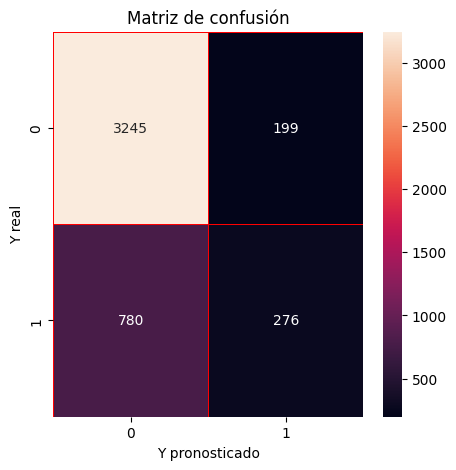

In [19]:
# visualizando la matriz de confusión

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, linewidths=0.5, linecolor='red', fmt='d', ax=ax)
plt.title('Matriz de confusión')
plt.xlabel('Y pronosticado')
plt.ylabel('Y real')
plt.show()

### 3.- Kernel Polinomial

In [20]:
# Ajuste para un kernel polinomial y matriz de confusión

clf = svm.SVC(kernel='poly')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
confusion_matrix(y_test, y_pred)


array([[3306,  138],
       [ 121,  935]])

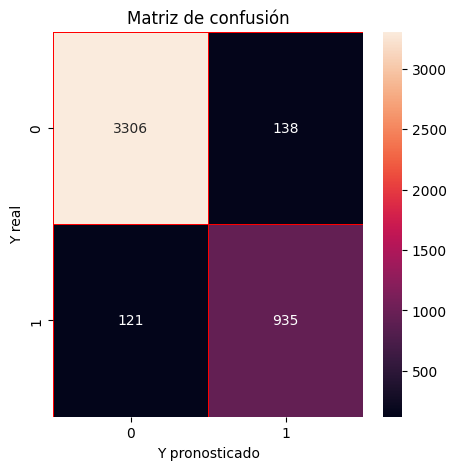

In [21]:
# visualizando la matriz de confusión

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, linewidths=0.5, linecolor='red', fmt='d', ax=ax)
plt.title('Matriz de confusión')
plt.xlabel('Y pronosticado')
plt.ylabel('Y real')
plt.show()

### Kernel Sigmoid

In [22]:
# Ajuste para un kernel sigmoid y matriz de confusión

clf = svm.SVC(kernel='sigmoid')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
confusion_matrix(y_test, y_pred)


array([[2772,  672],
       [ 737,  319]])

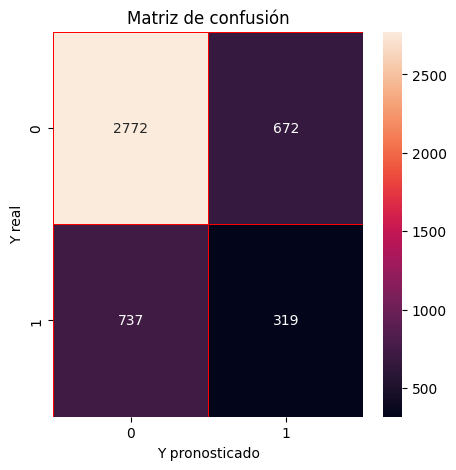

In [23]:
# visualizando la matriz de confusión

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, linewidths=0.5, linecolor='red', fmt='d', ax=ax)
plt.title('Matriz de confusión')
plt.xlabel('Y pronosticado')
plt.ylabel('Y real')
plt.show()

In [33]:
# realizar prueba para conocer si una persona se va a retirar o no

# se toma un registro de la base de datos
df_prueba = pd.read_csv('sujeto1.csv')
df_prueba

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.5,0.75,4,200,4,0,0,sales,medium


In [34]:
# Homogenizar las columnas
df_prueba = pd.get_dummies(df_prueba, columns=['salary', 'sales'])
dummy_columns = [col for col in df_prueba.columns if 'salary_' in col or 'sales_' in col]
df_prueba[dummy_columns] = df_prueba[dummy_columns].astype(int)
df_prueba


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_medium,sales_sales
0,0.5,0.75,4,200,4,0,0,1,1


In [35]:
# Realizar la predicción



ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- salary_high
- salary_low
- sales_IT
- sales_RandD
- sales_accounting
- ...
